## Introduction:

#### Context:

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had

#### Content:
This dataset contains the LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database. These files are current as of July 2017.

#### Acknowledgements:
This dataset was compiled by Rebrickable, which is a website to help identify what LEGO sets can be built given bricks and pieces from other LEGO sets and made available on Kaggle at the following [link](https://www.kaggle.com/datasets/rtatman/lego-database). 

#### Dataset Description:

The dataset contains 8 tables that are linked to each other through one or more relationships per the following schema:

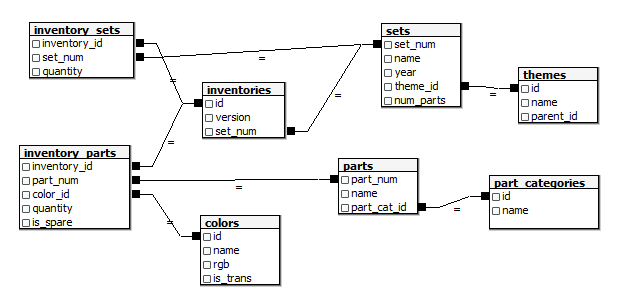



## Data Import:

In [78]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
sets_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/sets.csv')
themes_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/themes.csv')

## Data Exploration:

Theme Analysis:
1. Which are the top 5 themes with the most number of sets?
2. How has the number of sets released in each theme changed over time?
3. What are the average and maximum number of pieces in sets for each theme?
4. Which themes have the highest and lowest average number of pieces per set?

Parts Analysis:
1. What are the top 10 most commonly used parts in LEGO sets?
2. How has the availability of different parts changed over the years?
3. Which parts are used across multiple themes, and how many themes do they appear in?
4. What is the distribution of part categories in the dataset?

Color Analysis:
1. What are the most frequently used colors in LEGO sets?
2. How does the color distribution differ across different themes?
3. What is the average number of colors used in sets for each theme?
4. How has the usage of different colors changed over the years?

Set Analysis:
1. What is the distribution of the number of pieces in LEGO sets?
2. How does the average price of sets vary with the number of pieces?
3. Is there a correlation between the number of pieces and the average user rating of sets?
4. How has the average price of sets changed over time?

### Theme Analysis:

##### 1. Which are the top 5 themes with the most number of sets?

To start, I will explore the `sets` and `themes` tables first.

In [3]:
display(sets_df.head())
display(themes_df.head())

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [4]:
display(sets_df.info())
display(themes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         614 non-null    int64  
 1   name       614 non-null    object 
 2   parent_id  503 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ KB


None

The `sets` table has 5 columns and 11,673 rows with no missing values - this is a relatively clean data table.

The `themes` table has 3 columns and 614 rows with 111 missing values in the `parent_id` column.

Out of curiosity, I'm inspecting all the names of the available themes. LEGO seems to have quite a large selection of themes.

In [17]:
print("There are {} unique theme names.".format(themes_df.name.nunique()))
print("There are {} unique theme IDs.".format(themes_df.id.nunique()))

There are 402 unique theme names.
There are 614 unique theme IDs.


So we can see that there are quite a few repeated LEGO theme names but have different unique IDs. Let's see which theme names get duplicated.

In [72]:
#Count the occurrence of each unique values in the name column
theme_name_count = themes_df.name.value_counts()

#Set the threshold of the minimum count
threshold = 2

#Filter out theme names that have duplicates
theme_name_count = theme_name_count[theme_name_count > threshold]

In [98]:
# display(theme_name_count.index) #getting values from the first column of the series
# display(theme_name_count.values) #getting values from the second column of the series

In [141]:
#create function to add value lables on each bar
def addlabel(x):
    for i in range(len(x)):
        plt.text(i, x[i], x[i], ha = 'center', va = 'bottom', fontsize = 14)
        # function takes the x and y coordinates of the label (i and count[i] in this case), the text to be displayed (count[i])

#create function to graph bar charts
def barchart(x:list, y:list, title: str):

    # Normalize the data values to range [0, 1]
    normalized_values = (y - np.min(y)) / (np.max(y) - np.min(y))

    #Create a custom colormap with a gradient from lightest to darkest
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['lightblue', 'darkblue'])

    #Graph
    plt.figure(figsize = (20,10))
    plt.bar(x, y, color = cmap(normalized_values))
    addlabel(y)
    plt.title(title, fontsize = 16)

        #Rotate the x axis label for readability
    plt.xticks(rotation = 35, ha = 'right', fontsize = 14)

        #Remove the y axis label
    plt.yticks([])

    plt. show()

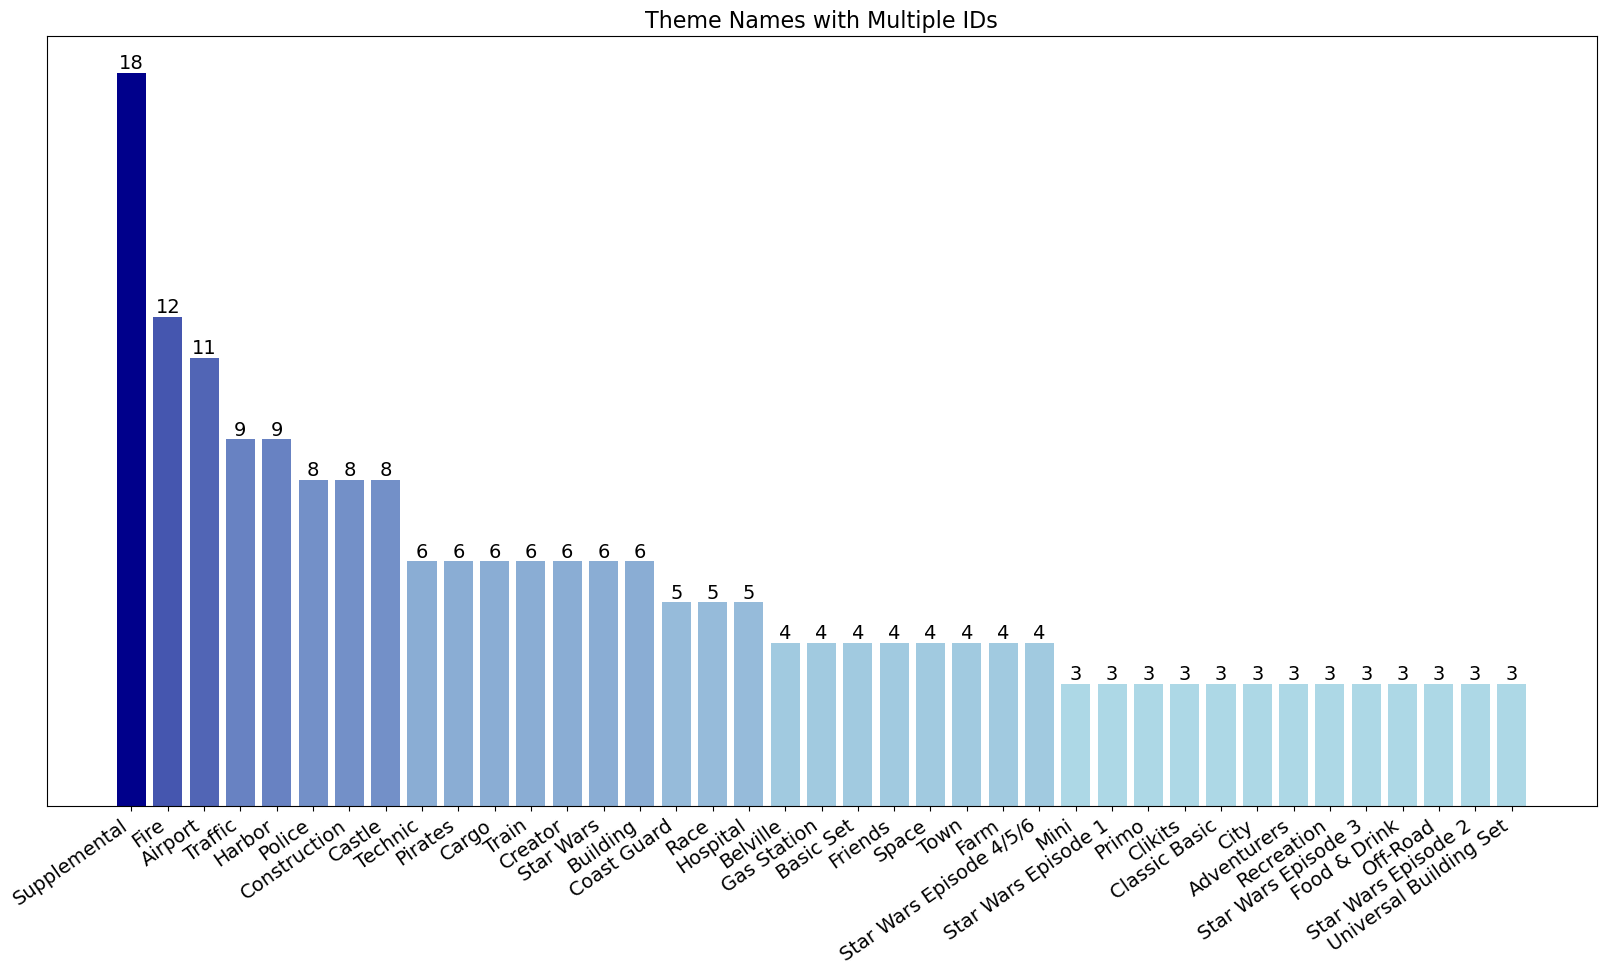

In [142]:
#Prepare values in list for graphing
theme_name = list(theme_name_count.index)
count = list(theme_name_count.values)

#graph bar chart
barchart(theme_name, count, 'Theme Names with Multiple IDs')

To answer this question, one option is to join the 2 tables and aggregate the relevant data.

In [9]:
sets_themes_df = sets_df.merge(themes_df, how = 'left', left_on = 'theme_id', right_on = 'id', suffixes = ('_sets', '_themes'))
display(sets_themes_df.head())

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0


We want to see the number of sets by themes

In [10]:
#finding count of sets by theme id and theme names, resetting index becase there are gaps in the theme_id due to the sets table
#not having all sets that are in the themes table
sets_by_themes = sets_themes_df.groupby(['theme_id','name_themes']).count().reset_index()

#drop unnecessary columns
sets_by_themes = sets_by_themes.drop(['name_sets', 'year', 'num_parts', 'id', 'parent_id'], axis = 1)

#rename the column for set_count
sets_by_themes = sets_by_themes.rename(columns = {'set_num': 'set_count'})

Here we have the 5 themes with the most number of of sets. 

In [134]:
sets_by_themes = sets_by_themes.sort_values('set_count', ascending= False)
sets_by_themes_5 = sets_by_themes.head(5)
display(sets_by_themes_5)

,theme_id,name_themes,set_count
474,501,Gear,246
354,371,Supplemental,240
477,504,Duplo,219
210,220,City,216
467,494,Friends,192


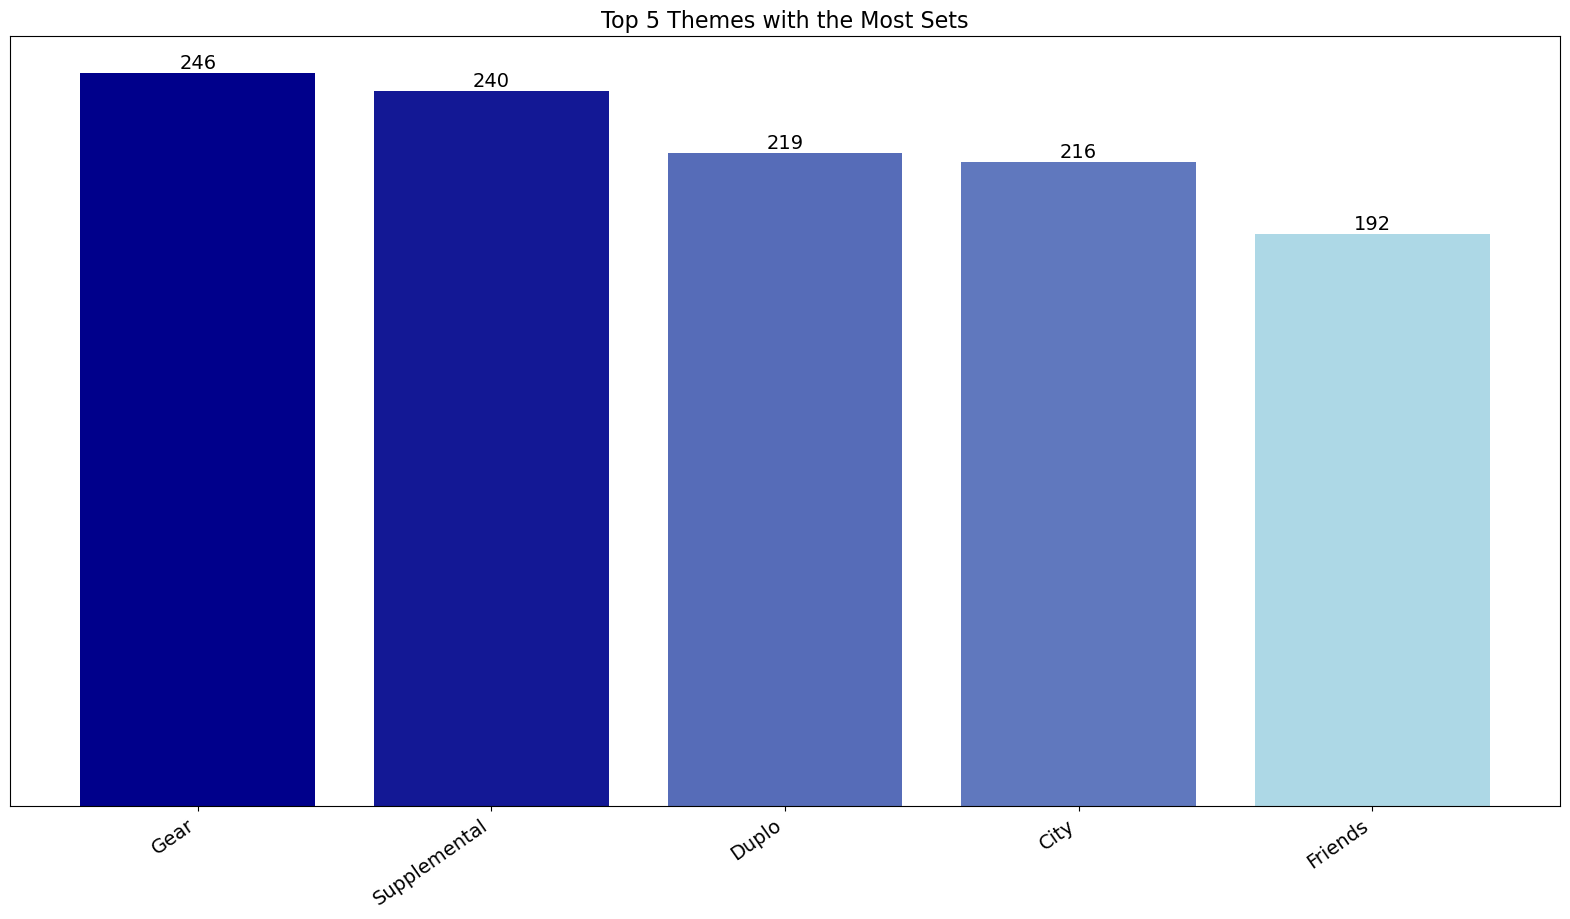

In [143]:
#Prepare values in list for graphing
theme_name = list(sets_by_themes_5.name_themes)
count = list(sets_by_themes_5.set_count)

#graph bar chart
barchart(theme_name, count, 'Top 5 Themes with the Most Sets')

##### b. How has the number of sets released in each of these 5 themes changed over time?

Here we would want to do line charts of time series for these 5 themes over time. We would want the years on x-axis and the count of each theme (by theme_id).

Need 5 lines that count number of sets for each year

In [149]:
#filter the dataframe to have only products that fall under the top 5 themes
sets_themes_df_top5 = sets_themes_df[sets_themes_df.theme_id.isin(list(sets_by_themes_5.theme_id))]
sets_themes_df_top5.head()

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
255,10500-1,Horse Stable,2013,504,44,504,Duplo,NaN
256,10501-1,Zoo friends,2013,504,5,504,Duplo,NaN
257,10504-1,My First Circus,2013,504,62,504,Duplo,NaN
258,10505-1,Play House,2013,504,83,504,Duplo,NaN
259,10506-1,Train Accessory Set,2013,504,24,504,Duplo,NaN


In [178]:
#prepare data for line chart
year = list(sets_themes_df_top5.year.unique())

#aggregate the count of sets per year per theme
grouped_data = sets_themes_df_top5.groupby(['year', 'name_themes']).size().reset_index(name='count')

# use .reset_index(name='count') after size() to provide a new name for the count column and reset the index. 
#However, for count(), you don't need to reset the index or provide a new name because the resulting structure is already
#well-defined.
pivot_data = grouped_data.pivot(index = 'year', columns = 'name_themes', values = 'count')

Text(0, 0.5, 'Number of Sets')

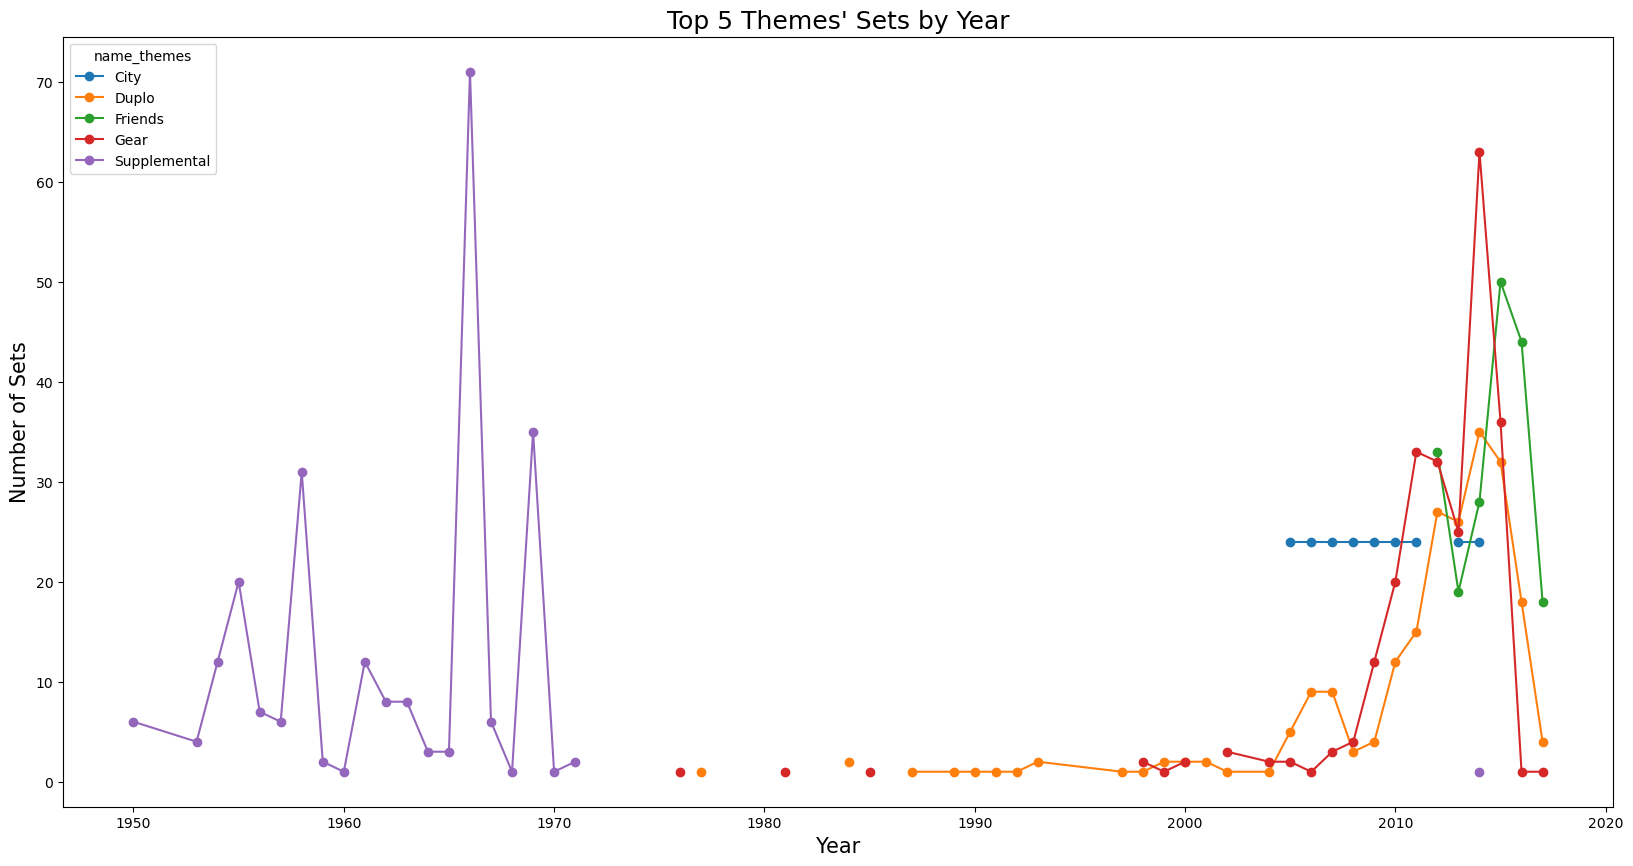

In [177]:
#create line chart
pivot_data.plot(kind = 'line', marker = 'o', figsize = (20,10))
plt.title("Top 5 Themes' Sets by Year", fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel("Number of Sets", fontsize = 15)

- We see that this particular `Supplemental` set used to be very popular in the past but has been largely discontinued.
- `Duplo` and `Gear` themes made its presence since the 1970s and has become more consistently present in the 1980s with the great rise in number in the 2010s. 
- `Friends` theme made an appearence since the early 2010s and have also been rising in numbers of sets. 
- `City` theme seems short-lived in the late 2000s and early 2010s. 